# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Conclusions

# - Max Temp

# - Humidity

# - Cloudiness

# - Wind Speed


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#change back to size=1500
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# print(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

print(url)

https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=c7693369dbd2f21db3a15ed0319721a1


In [4]:
record_count = 1
city_data = []

for index,city in enumerate(cities):
    #create empty dict for each city data
    city_dict = {}
    
    query_url = f"{url}&q={city}"
#     print(query_url)
    
    response = requests.get(query_url).json()
    
    try:
        time.sleep(1)
                
        city_dict['City'] = response['name']
        city_dict['Country'] = response['sys']['country']
        city_dict['Lat'] = response['coord']['lat']
        city_dict['Lng'] = response['coord']['lon']
        city_dict['Humidity'] = response['main']['humidity']
        city_dict['Cloudiness'] = response['clouds']['all']
        city_dict['Max Temperature'] = response['main']['temp_max']
        city_dict['Wind Speed'] = response['wind']['speed']
        city_dict['Date'] = response['dt']
        
        city_data.append(city_dict)
        
        print(json.dumps(response,indent=4,sort_keys=True))
            
    except:
        print("City not found.")

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 71.2906,
        "lon": -156.7887
    },
    "dt": 1628289904,
    "id": 5880054,
    "main": {
        "feels_like": 32.52,
        "humidity": 87,
        "pressure": 1019,
        "temp": 39.22,
        "temp_max": 39.22,
        "temp_min": 39.22
    },
    "name": "Barrow",
    "sys": {
        "country": "US",
        "id": 7649,
        "sunrise": 1628251411,
        "sunset": 1628326948,
        "type": 1
    },
    "timezone": -28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 10.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 69
    },
    "cod": 200,
    "coord": {
        "lat": -22.6667,
        "lon": 167.4833
    },
    "dt": 1628290402,
    "

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 64.2539,
        "lon": -15.2082
    },
    "dt": 1628290417,
    "id": 2630299,
    "main": {
        "feels_like": 50.61,
        "grnd_level": 1007,
        "humidity": 88,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 51.62,
        "temp_max": 51.62,
        "temp_min": 51.62
    },
    "name": "Hofn",
    "sys": {
        "country": "IS",
        "sunrise": 1628223797,
        "sunset": 1628286609
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 65,
        "gust": 2.95,
        "speed": 2.62
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 68.75,
        "lon": 161.3
    },
    

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -42.8794,
        "lon": 147.3294
    },
    "dt": 1628289896,
    "id": 2163355,
    "main": {
        "feels_like": 50.04,
        "humidity": 66,
        "pressure": 1011,
        "temp": 52.03,
        "temp_max": 53.26,
        "temp_min": 49.26
    },
    "name": "Hobart",
    "sys": {
        "country": "AU",
        "id": 2002195,
        "sunrise": 1628284523,
        "sunset": 1628320658,
        "type": 2
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "gust": 14,
        "speed": 10
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 37.5683,
        "lon": 126.9778
    },
    "dt": 16

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 28.3047,
        "lon": -81.4167
    },
    "dt": 1628290378,
    "id": 4160983,
    "main": {
        "feels_like": 97.74,
        "humidity": 67,
        "pressure": 1017,
        "temp": 87.66,
        "temp_max": 93.45,
        "temp_min": 78.84
    },
    "name": "Kissimmee",
    "sys": {
        "country": "US",
        "id": 2017589,
        "sunrise": 1628247038,
        "sunset": 1628295146,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 0,
        "speed": 0
    }
}
City not found.
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -37.6167,
        "lon": -73.65
    },
    "dt": 1

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": -2.5744,
        "lon": 150.7967
    },
    "dt": 1628290059,
    "id": 2094342,
    "main": {
        "feels_like": 91.08,
        "grnd_level": 1011,
        "humidity": 71,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 84.13,
        "temp_max": 84.13,
        "temp_min": 84.13
    },
    "name": "Kavieng",
    "sys": {
        "country": "PG",
        "sunrise": 1628280133,
        "sunset": 1628323383
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 114,
        "gust": 14.52,
        "speed": 11.68
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 72.7868,
        "lon": -56.

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 50
    },
    "cod": 200,
    "coord": {
        "lat": -1.5,
        "lon": 33.8
    },
    "dt": 1628290480,
    "id": 152451,
    "main": {
        "feels_like": 71.1,
        "grnd_level": 887,
        "humidity": 67,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 71.13,
        "temp_max": 71.13,
        "temp_min": 71.13
    },
    "name": "Musoma",
    "sys": {
        "country": "TZ",
        "sunrise": 1628308133,
        "sunset": 1628351537
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 78,
        "gust": 6.6,
        "speed": 5.57
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 59
    },
    "cod": 200,
    "coord": {
        "lat": 52.7833,
        "lon": 7.2

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 27.0377,
        "lon": 14.4283
    },
    "dt": 1628290497,
    "id": 2212775,
    "main": {
        "feels_like": 86.45,
        "grnd_level": 963,
        "humidity": 11,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 90.66,
        "temp_max": 90.66,
        "temp_min": 90.66
    },
    "name": "Sabha",
    "sys": {
        "country": "LY",
        "sunrise": 1628310578,
        "sunset": 1628358390
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 72,
        "gust": 9.19,
        "speed": 7.74
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -54.8,
        "lon": -68.3
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -33.918,
        "lon": 25.5701
    },
    "dt": 1628290026,
    "id": 964420,
    "main": {
        "feels_like": 49.39,
        "humidity": 93,
        "pressure": 1023,
        "temp": 50.29,
        "temp_max": 50.29,
        "temp_min": 49.1
    },
    "name": "Port Elizabeth",
    "sys": {
        "country": "ZA",
        "id": 1973,
        "sunrise": 1628312692,
        "sunset": 1628350929,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 4.61
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 50
    },
    "cod": 200,
    "coord": {
        "lat": -6.9811,
        "lon": -34.8339
    },
    "dt": 1628290399,
    "id": 34

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 45.5234,
        "lon": -122.6762
    },
    "dt": 1628290072,
    "id": 5746545,
    "main": {
        "feels_like": 78.8,
        "humidity": 61,
        "pressure": 1018,
        "temp": 78.39,
        "temp_max": 82.42,
        "temp_min": 74.68
    },
    "name": "Portland",
    "sys": {
        "country": "US",
        "id": 2008548,
        "sunrise": 1628254853,
        "sunset": 1628307133,
        "type": 2
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 200,
        "gust": 7,
        "speed": 4
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 5.4112,
        "lon": 100.3354
  

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 55.2999,
        "lon": -123.1698
    },
    "dt": 1628290548,
    "id": 6063191,
    "main": {
        "feels_like": 64.6,
        "humidity": 39,
        "pressure": 1006,
        "temp": 66.42,
        "temp_max": 66.42,
        "temp_min": 66.42
    },
    "name": "Mackenzie",
    "sys": {
        "country": "CA",
        "id": 1016,
        "sunrise": 1628253006,
        "sunset": 1628309217,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 230,
        "speed": 5.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": -10.4389,
        "lon": -62.4664
    },
    "dt": 

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 66.1451,
        "lon": -65.7125
    },
    "dt": 1628290398,
    "id": 6096551,
    "main": {
        "feels_like": 36.97,
        "humidity": 81,
        "pressure": 996,
        "temp": 42.8,
        "temp_max": 42.8,
        "temp_min": 42.8
    },
    "name": "Pangnirtung",
    "sys": {
        "country": "CA",
        "id": 968,
        "sunrise": 1628234843,
        "sunset": 1628299803,
        "type": 1
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 260,
        "speed": 10.36
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": -33.0117,
        "lon": 17.9442
    },
    "dt": 1628290174,
    "id

{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat": 66.7697,
        "lon": 123.3711
    },
    "dt": 1628290578,
    "id": 2012530,
    "main": {
        "feels_like": 55.78,
        "grnd_level": 1009,
        "humidity": 46,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 58.1,
        "temp_max": 58.1,
        "temp_min": 58.1
    },
    "name": "Zhigansk",
    "sys": {
        "country": "RU",
        "sunrise": 1628275554,
        "sunset": 1628341125
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 54,
        "gust": 6.58,
        "speed": 5.19
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 22.5667,
        "lon": 59.5289
    }

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 34.8986,
        "lon": -117.0228
    },
    "dt": 1628290309,
    "id": 5326297,
    "main": {
        "feels_like": 95.9,
        "grnd_level": 939,
        "humidity": 5,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 102.16,
        "temp_max": 104.99,
        "temp_min": 95.14
    },
    "name": "Barstow",
    "sys": {
        "country": "US",
        "id": 3782,
        "sunrise": 1628254905,
        "sunset": 1628304368,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 249,
        "gust": 15.48,
        "speed": 13.58
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 37.1041,
        "lon": -113.5841
    },
    "dt": 1628290299,
    "id": 5546220,
    "main": {
        "feels_like": 96.39,
        "humidity": 5,
        "pressure": 1009,
        "temp": 102.76,
        "temp_max": 104.47,
        "temp_min": 101.35
    },
    "name": "Saint George",
    "sys": {
        "country": "US",
        "id": 2008042,
        "sunrise": 1628253825,
        "sunset": 1628303798,
        "type": 2
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 300,
        "gust": 23,
        "speed": 8.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 22
    },
    "cod": 200,
    "coord": {
        "lat": 18.0866,
        "lon": -67.1457
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 13
    },
    "cod": 200,
    "coord": {
        "lat": 27.9769,
        "lon": -114.0611
    },
    "dt": 1628290626,
    "id": 4021858,
    "main": {
        "feels_like": 84.16,
        "grnd_level": 1011,
        "humidity": 58,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 82.08,
        "temp_max": 82.08,
        "temp_min": 82.08
    },
    "name": "Guerrero Negro",
    "sys": {
        "country": "MX",
        "sunrise": 1628254907,
        "sunset": 1628302945
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 313,
        "gust": 13.47,
        "speed": 15.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 63.05,
        "lon": 17

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 9
    },
    "cod": 200,
    "coord": {
        "lat": -15.25,
        "lon": -68.1667
    },
    "dt": 1628290645,
    "id": 3910758,
    "main": {
        "feels_like": 68.59,
        "grnd_level": 929,
        "humidity": 61,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 69.12,
        "temp_max": 69.12,
        "temp_min": 69.12
    },
    "name": "Mapiri",
    "sys": {
        "country": "BO",
        "sunrise": 1628247214,
        "sunset": 1628288610
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 70,
        "gust": 2.35,
        "speed": 1.32
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": 66.8333,
        "lon": 70

{
    "base": "stations",
    "clouds": {
        "all": 81
    },
    "cod": 200,
    "coord": {
        "lat": 20.0431,
        "lon": -77.5828
    },
    "dt": 1628290662,
    "id": 3545981,
    "main": {
        "feels_like": 92.17,
        "grnd_level": 1014,
        "humidity": 72,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 84.45,
        "temp_max": 84.45,
        "temp_min": 84.45
    },
    "name": "Niquero",
    "sys": {
        "country": "CU",
        "sunrise": 1628246852,
        "sunset": 1628293491
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 197,
        "gust": 4.07,
        "speed": 2.51
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 76
    },
    "cod": 200,
    "coord": {
        "lat": 42.7762,
        "lon": -9.0603


{
    "base": "stations",
    "clouds": {
        "all": 34
    },
    "cod": 200,
    "coord": {
        "lat": 71.6872,
        "lon": 128.8694
    },
    "dt": 1628290255,
    "id": 2015306,
    "main": {
        "feels_like": 40.44,
        "grnd_level": 1018,
        "humidity": 87,
        "pressure": 1023,
        "sea_level": 1023,
        "temp": 43.07,
        "temp_max": 43.07,
        "temp_min": 43.07
    },
    "name": "Tiksi",
    "sys": {
        "country": "RU",
        "sunrise": 1628268566,
        "sunset": 1628345475
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 74,
        "gust": 4.5,
        "speed": 4.52
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 10
    },
    "cod": 200,
    "coord": {
        "lat": 59.0556,
        "lon": 80.8572
  

{
    "base": "stations",
    "clouds": {
        "all": 63
    },
    "cod": 200,
    "coord": {
        "lat": 70.3705,
        "lon": 31.1107
    },
    "dt": 1628290694,
    "id": 777019,
    "main": {
        "feels_like": 51.39,
        "grnd_level": 1017,
        "humidity": 85,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 52.45,
        "temp_max": 52.45,
        "temp_min": 52.45
    },
    "name": "Vard\u00f8",
    "sys": {
        "country": "NO",
        "sunrise": 1628294383,
        "sunset": 1628366578
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 174,
        "gust": 11.65,
        "speed": 10.13
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 59.7035,
        "lon": 30.7861

{
    "base": "stations",
    "clouds": {
        "all": 91
    },
    "cod": 200,
    "coord": {
        "lat": 10.5669,
        "lon": 72.642
    },
    "dt": 1628290514,
    "id": 1267390,
    "main": {
        "feels_like": 88.81,
        "grnd_level": 1007,
        "humidity": 79,
        "pressure": 1009,
        "sea_level": 1009,
        "temp": 82.11,
        "temp_max": 82.11,
        "temp_min": 82.11
    },
    "name": "Kavaratti",
    "rain": {
        "1h": 0.24
    },
    "sys": {
        "country": "IN",
        "sunrise": 1628297946,
        "sunset": 1628343082
    },
    "timezone": 19800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 277,
        "gust": 30.44,
        "speed": 21.81
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 50
    },
    "cod": 200,
    "coord": {
        "la

{
    "base": "stations",
    "clouds": {
        "all": 56
    },
    "cod": 200,
    "coord": {
        "lat": 20.5022,
        "lon": -10.0711
    },
    "dt": 1628290130,
    "id": 2381972,
    "main": {
        "feels_like": 93.76,
        "grnd_level": 969,
        "humidity": 24,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 96.04,
        "temp_max": 96.04,
        "temp_min": 96.04
    },
    "name": "Adrar",
    "sys": {
        "country": "MR",
        "sunrise": 1628230607,
        "sunset": 1628277333
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 233,
        "gust": 18.1,
        "speed": 11.43
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 45
    },
    "cod": 200,
    "coord": {
        "lat": 47.4667,
        "lon": 84.8667
    },


{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": -26.6481,
        "lon": 15.1594
    },
    "dt": 1628290325,
    "id": 3355672,
    "main": {
        "feels_like": 55.89,
        "grnd_level": 1015,
        "humidity": 61,
        "pressure": 1019,
        "sea_level": 1019,
        "temp": 57.56,
        "temp_max": 57.56,
        "temp_min": 57.56
    },
    "name": "L\u00fcderitz",
    "sys": {
        "country": "NA",
        "sunrise": 1628314509,
        "sunset": 1628354108
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 151,
        "gust": 3.38,
        "speed": 2.48
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -4.9667,
        "lon": 39.8333
   

{
    "base": "stations",
    "clouds": {
        "all": 93
    },
    "cod": 200,
    "coord": {
        "lat": 16.5167,
        "lon": -98.75
    },
    "dt": 1628290472,
    "id": 3516171,
    "main": {
        "feels_like": 91.29,
        "grnd_level": 1011,
        "humidity": 71,
        "pressure": 1011,
        "sea_level": 1011,
        "temp": 84.22,
        "temp_max": 84.22,
        "temp_min": 84.22
    },
    "name": "Barra de Tecoanapa",
    "sys": {
        "country": "MX",
        "sunrise": 1628252219,
        "sunset": 1628298284
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 184,
        "gust": 7.09,
        "speed": 6.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 39.1834,
        "lon"

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 26.5921,
        "lon": 12.7805
    },
    "dt": 1628290775,
    "id": 2219235,
    "main": {
        "feels_like": 84.97,
        "grnd_level": 959,
        "humidity": 12,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 88.9,
        "temp_max": 88.9,
        "temp_min": 88.9
    },
    "name": "Ubari",
    "sys": {
        "country": "LY",
        "sunrise": 1628311015,
        "sunset": 1628358745
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 97,
        "gust": 5.77,
        "speed": 5.12
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 5.6639,
        "lon": -67.6236
    },
    "dt":

{
    "base": "stations",
    "clouds": {
        "all": 51
    },
    "cod": 200,
    "coord": {
        "lat": 36.3667,
        "lon": 139.5833
    },
    "dt": 1628290793,
    "id": 1850630,
    "main": {
        "feels_like": 98.64,
        "grnd_level": 1000,
        "humidity": 76,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 86.29,
        "temp_max": 86.29,
        "temp_min": 78.22
    },
    "name": "Tanuma",
    "sys": {
        "country": "JP",
        "id": 20751,
        "sunrise": 1628279566,
        "sunset": 1628329333,
        "type": 2
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 77,
        "gust": 4.94,
        "speed": 3.76
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 47
    },
    "cod": 200,
    "coord": {
        "lat": 7.9803,
        "lon": 49.8164
    },
    "dt": 1628290813,
    "id": 60019,
    "main": {
        "feels_like": 76.3,
        "grnd_level": 1006,
        "humidity": 75,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 75.52,
        "temp_max": 75.52,
        "temp_min": 75.52
    },
    "name": "Eyl",
    "sys": {
        "country": "SO",
        "sunrise": 1628303614,
        "sunset": 1628348369
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 212,
        "gust": 38.65,
        "speed": 22.26
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 68.2191,
        "lo

{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "lat": 42.0304,
        "lon": -8.1588
    },
    "dt": 1628290504,
    "id": 7117100,
    "main": {
        "feels_like": 52.56,
        "grnd_level": 904,
        "humidity": 82,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 53.64,
        "temp_max": 54.73,
        "temp_min": 52.21
    },
    "name": "Vila",
    "sys": {
        "country": "PT",
        "id": 2007751,
        "sunrise": 1628227869,
        "sunset": 1628279152,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 218,
        "gust": 7.45,
        "speed": 3.71
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 59.5833,
        "lon": 151.2833
    },
    "dt": 1628290853,
    "id": 2122574,
    "main": {
        "feels_like": 58.33,
        "grnd_level": 1020,
        "humidity": 56,
        "pressure": 1021,
        "sea_level": 1021,
        "temp": 60.01,
        "temp_max": 60.01,
        "temp_min": 60.01
    },
    "name": "Ola",
    "sys": {
        "country": "RU",
        "sunrise": 1628272298,
        "sunset": 1628330985
    },
    "timezone": 39600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 31,
        "gust": 19.95,
        "speed": 15.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 22.2394,
        "lon": 68.9678
    },
   

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 29.1268,
        "lon": 15.9477
    },
    "dt": 1628290871,
    "id": 2216645,
    "main": {
        "feels_like": 87.33,
        "grnd_level": 981,
        "humidity": 12,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 91.67,
        "temp_max": 91.67,
        "temp_min": 91.67
    },
    "name": "H\u016bn",
    "sys": {
        "country": "LY",
        "sunrise": 1628310016,
        "sunset": 1628358223
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 147,
        "gust": 4.9,
        "speed": 4.65
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 50.7714,
        "lon": 0.1027
    },
    "

{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": -0.4536,
        "lon": 39.6401
    },
    "dt": 1628290890,
    "id": 197745,
    "main": {
        "feels_like": 73.22,
        "grnd_level": 998,
        "humidity": 77,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 72.64,
        "temp_max": 72.64,
        "temp_min": 72.64
    },
    "name": "Garissa",
    "sys": {
        "country": "KE",
        "sunrise": 1628306658,
        "sunset": 1628350209
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 161,
        "gust": 31.63,
        "speed": 18.07
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 23
    },
    "cod": 200,
    "coord": {
        "lat": 68.0531,
        "lon": 39.5131
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 46.5331,
        "lon": 48.3456
    },
    "dt": 1628290907,
    "id": 541349,
    "main": {
        "feels_like": 73.35,
        "grnd_level": 1012,
        "humidity": 25,
        "pressure": 1010,
        "sea_level": 1010,
        "temp": 74.97,
        "temp_max": 75.13,
        "temp_min": 74.97
    },
    "name": "Krasnyy Yar",
    "sys": {
        "country": "RU",
        "id": 48832,
        "sunrise": 1628300084,
        "sunset": 1628352606,
        "type": 2
    },
    "timezone": 14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 59,
        "gust": 25.03,
        "speed": 9.89
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 79
    },
    "cod": 200,
    "coord": {
        "lat

{
    "base": "stations",
    "clouds": {
        "all": 20
    },
    "cod": 200,
    "coord": {
        "lat": 40.5982,
        "lon": -124.1573
    },
    "dt": 1628290432,
    "id": 5563839,
    "main": {
        "feels_like": 74.5,
        "humidity": 66,
        "pressure": 1017,
        "temp": 74.26,
        "temp_max": 93.47,
        "temp_min": 71.1
    },
    "name": "Fortuna",
    "sys": {
        "country": "US",
        "id": 2040243,
        "sunrise": 1628255924,
        "sunset": 1628306773,
        "type": 2
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 239,
        "gust": 14,
        "speed": 5.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 78
    },
    "cod": 200,
    "coord": {
        "lat": 47.6931,
        "lon": 40.1025
    },
    "dt": 16

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 66.9395,
        "lon": -53.6735
    },
    "dt": 1628290937,
    "id": 3419842,
    "main": {
        "feels_like": 36.59,
        "grnd_level": 1003,
        "humidity": 90,
        "pressure": 1005,
        "sea_level": 1005,
        "temp": 43.09,
        "temp_max": 43.09,
        "temp_min": 43.09
    },
    "name": "Sisimiut",
    "rain": {
        "1h": 0.62
    },
    "sys": {
        "country": "GL",
        "sunrise": 1628231400,
        "sunset": 1628297467
    },
    "timezone": -7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 168,
        "gust": 25.46,
        "speed": 12.41
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 88
    },
    "cod": 200,
    "coord": {
        "

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -12.2333,
        "lon": 136.7667
    },
    "dt": 1628290953,
    "id": 2064735,
    "main": {
        "feels_like": 78.31,
        "humidity": 69,
        "pressure": 1017,
        "temp": 77.61,
        "temp_max": 77.61,
        "temp_min": 77.61
    },
    "name": "Nhulunbuy",
    "sys": {
        "country": "AU",
        "id": 9576,
        "sunrise": 1628284194,
        "sunset": 1628326056,
        "type": 1
    },
    "timezone": 34200,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 130,
        "speed": 17.27
    }
}
City not found.
{
    "base": "stations",
    "clouds": {
        "all": 2
    },
    "cod": 200,
    "coord": {
        "lat": -20.7377,
        "lon": 116.8463
    },
    "dt": 1

City not found.
City not found.
{
    "base": "stations",
    "clouds": {
        "all": 58
    },
    "cod": 200,
    "coord": {
        "lat": 21.2311,
        "lon": -86.731
    },
    "dt": 1628290972,
    "id": 3526756,
    "main": {
        "feels_like": 98.01,
        "grnd_level": 1016,
        "humidity": 70,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 87.17,
        "temp_max": 87.17,
        "temp_min": 87.17
    },
    "name": "Isla Mujeres",
    "sys": {
        "country": "MX",
        "id": 47730,
        "sunrise": 1628248948,
        "sunset": 1628295785,
        "type": 2
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04d",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 113,
        "gust": 12.97,
        "speed": 10.47
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 9
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 10.2849,
        "lon": 22.7882
    },
    "dt": 1628290934,
    "id": 240210,
    "main": {
        "feels_like": 72.9,
        "grnd_level": 960,
        "humidity": 97,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 71.49,
        "temp_max": 71.49,
        "temp_min": 71.49
    },
    "name": "Birao",
    "rain": {
        "1h": 2.77
    },
    "sys": {
        "country": "CF",
        "sunrise": 1628309933,
        "sunset": 1628355023
    },
    "timezone": 3600,
    "visibility": 4461,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 237,
        "gust": 4.27,
        "speed": 2.53
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 72
    },
    "cod": 200,
    "coord": {
        "lat": 12

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 45
    },
    "cod": 200,
    "coord": {
        "lat": 50.5167,
        "lon": 115.1333
    },
    "dt": 1628291004,
    "id": 2019118,
    "main": {
        "feels_like": 67.33,
        "grnd_level": 932,
        "humidity": 58,
        "pressure": 1000,
        "sea_level": 1000,
        "temp": 68.09,
        "temp_max": 68.09,
        "temp_min": 68.09
    },
    "name": "Nizhniy Tsasuchey",
    "sys": {
        "country": "RU",
        "sunrise": 1628283323,
        "sunset": 1628337310
    },
    "timezone": 32400,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 169,
        "gust": 10.6,
        "speed": 6.17
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 31.953

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": -9.1061,
        "lon": 124.8925
    },
    "dt": 1628291020,
    "id": 1651103,
    "main": {
        "feels_like": 71.26,
        "grnd_level": 977,
        "humidity": 73,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 71.02,
        "temp_max": 71.02,
        "temp_min": 71.02
    },
    "name": "Atambua",
    "sys": {
        "country": "ID",
        "sunrise": 1628286816,
        "sunset": 1628329134
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03d",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 134,
        "gust": 12.12,
        "speed": 6.35
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 69.3833,
        "lon": 178.4

{
    "base": "stations",
    "clouds": {
        "all": 97
    },
    "cod": 200,
    "coord": {
        "lat": -21.8322,
        "lon": -46.8936
    },
    "dt": 1628291035,
    "id": 3445500,
    "main": {
        "feels_like": 65.32,
        "grnd_level": 943,
        "humidity": 54,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 66.43,
        "temp_max": 66.43,
        "temp_min": 66.43
    },
    "name": "Vargem Grande do Sul",
    "sys": {
        "country": "BR",
        "sunrise": 1628242628,
        "sunset": 1628282985
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 75,
        "gust": 6.64,
        "speed": 4.72
    }
}
City not found.
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 4.

{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 51.3813,
        "lon": 1.3862
    },
    "dt": 1628291053,
    "id": 2643044,
    "main": {
        "feels_like": 56.91,
        "humidity": 84,
        "pressure": 1003,
        "temp": 57.51,
        "temp_max": 60.51,
        "temp_min": 55.69
    },
    "name": "Margate",
    "sys": {
        "country": "GB",
        "id": 2020742,
        "sunrise": 1628310478,
        "sunset": 1628364750,
        "type": 2
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 195,
        "gust": 5.99,
        "speed": 3
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 58.8053,
        "lon": -122.7002
    },
    "dt": 1628290

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 54.3161,
        "lon": -130.3201
    },
    "dt": 1628291070,
    "id": 6113406,
    "main": {
        "feels_like": 60.53,
        "humidity": 82,
        "pressure": 1014,
        "temp": 60.89,
        "temp_max": 60.89,
        "temp_min": 60.89
    },
    "name": "Prince Rupert",
    "rain": {
        "1h": 0.63
    },
    "sys": {
        "country": "CA",
        "id": 883,
        "sunrise": 1628254970,
        "sunset": 1628310685,
        "type": 1
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 150,
        "speed": 5.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 30
    },
    "cod": 200,
    "coord": {
        "lat": -8.145,
        "lon": 159.59

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 5.3505,
        "lon": 48.5268
    },
    "dt": 1628291086,
    "id": 57000,
    "main": {
        "feels_like": 76.51,
        "grnd_level": 1011,
        "humidity": 78,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 75.6,
        "temp_max": 75.6,
        "temp_min": 75.6
    },
    "name": "Hobyo",
    "sys": {
        "country": "SO",
        "sunrise": 1628304113,
        "sunset": 1628348489
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 202,
        "gust": 39.8,
        "speed": 27.72
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 26.1247,
        "lon": 127.6694
    },

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 37.5633,
        "lon": -1.8097
    },
    "dt": 1628291101,
    "id": 2514370,
    "main": {
        "feels_like": 82.85,
        "grnd_level": 955,
        "humidity": 43,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 83.1,
        "temp_max": 83.98,
        "temp_min": 76.12
    },
    "name": "Puerto Lumbreras",
    "sys": {
        "country": "ES",
        "id": 2037215,
        "sunrise": 1628313379,
        "sunset": 1628363383,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 5,
        "gust": 3.27,
        "speed": 1.79
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 8
    },
    "cod": 200,
    "coord": {
        "l

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 27.0998,
        "lon": -82.4543
    },
    "dt": 1628291121,
    "id": 4176380,
    "main": {
        "feels_like": 100.02,
        "humidity": 73,
        "pressure": 1017,
        "temp": 87.42,
        "temp_max": 90.16,
        "temp_min": 81.99
    },
    "name": "Venice",
    "sys": {
        "country": "US",
        "id": 2005161,
        "sunrise": 1628247401,
        "sunset": 1628295280,
        "type": 2
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 219,
        "gust": 13,
        "speed": 8.99
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 18
    },
    "cod": 200,
    "coord": {
        "lat": 63.4427,
        "lon": -20.2734
    },
    "dt": 162

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 55.2834,
        "lon": -114.769
    },
    "dt": 1628290950,
    "id": 6149374,
    "main": {
        "feels_like": 57.02,
        "humidity": 94,
        "pressure": 1007,
        "temp": 57.18,
        "temp_max": 57.18,
        "temp_min": 57.18
    },
    "name": "Slave Lake",
    "sys": {
        "country": "CA",
        "id": 1008,
        "sunrise": 1628250991,
        "sunset": 1628307200,
        "type": 1
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 5.75
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 6
    },
    "cod": 200,
    "coord": {
        "lat": 49.5499,
        "lon": 17.3336
    },
    "dt": 1628291138,
    "

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -22.5128,
        "lon": -44.0006
    },
    "dt": 1628291154,
    "id": 3453767,
    "main": {
        "feels_like": 59.56,
        "grnd_level": 984,
        "humidity": 92,
        "pressure": 1028,
        "sea_level": 1028,
        "temp": 59.58,
        "temp_max": 59.58,
        "temp_min": 59.58
    },
    "name": "Pinheiral",
    "sys": {
        "country": "BR",
        "sunrise": 1628241990,
        "sunset": 1628282235
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 114,
        "gust": 6.8,
        "speed": 3.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 26
    },
    "cod": 200,
    "coord": {
        "lat": 53.5605,
        "lon": -0.0

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 30.4833,
        "lon": -115.95
    },
    "dt": 1628291172,
    "id": 3984997,
    "main": {
        "feels_like": 74.93,
        "grnd_level": 1011,
        "humidity": 68,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 74.57,
        "temp_max": 74.57,
        "temp_min": 74.57
    },
    "name": "San Quint\u00edn",
    "sys": {
        "country": "MX",
        "sunrise": 1628255115,
        "sunset": 1628303643
    },
    "timezone": -25200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 287,
        "gust": 5.57,
        "speed": 9.37
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -5.2246,
        "lon": 145.7

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.476,
        "lon": 21.4499
    },
    "dt": 1628291187,
    "id": 762199,
    "main": {
        "feels_like": 55.06,
        "humidity": 64,
        "pressure": 995,
        "temp": 56.68,
        "temp_max": 57.81,
        "temp_min": 54.27
    },
    "name": "Pionki",
    "sys": {
        "country": "PL",
        "id": 2031506,
        "sunrise": 1628305638,
        "sunset": 1628359960,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 276,
        "gust": 27.69,
        "speed": 15.82
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 62
    },
    "cod": 200,
    "coord": {
        "lat": 64.8655,
        "lon": 11.6047
    },
    "dt"

{
    "base": "stations",
    "clouds": {
        "all": 95
    },
    "cod": 200,
    "coord": {
        "lat": -21.4803,
        "lon": -56.1381
    },
    "dt": 1628290950,
    "id": 3460087,
    "main": {
        "feels_like": 72.91,
        "grnd_level": 987,
        "humidity": 30,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 74.37,
        "temp_max": 74.37,
        "temp_min": 74.37
    },
    "name": "Jardim",
    "sys": {
        "country": "BR",
        "sunrise": 1628244817,
        "sunset": 1628285233
    },
    "timezone": -14400,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 111,
        "gust": 3.47,
        "speed": 3.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 7
    },
    "cod": 200,
    "coord": {
        "lat": 40.922,
        "lon": 14.5329
 

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -20.7333,
        "lon": 139.5
    },
    "dt": 1628291220,
    "id": 2065594,
    "main": {
        "feels_like": 59.76,
        "humidity": 31,
        "pressure": 1025,
        "temp": 62.37,
        "temp_max": 62.37,
        "temp_min": 62.37
    },
    "name": "Mount Isa",
    "sys": {
        "country": "AU",
        "id": 9495,
        "sunrise": 1628284188,
        "sunset": 1628324750,
        "type": 1
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 140,
        "speed": 16.11
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 42.6667,
        "lon": 9.3333
    },
    "dt": 1628291222,
    "id": 3034639

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 23.9167,
        "lon": -106.9
    },
    "dt": 1628291236,
    "id": 4002745,
    "main": {
        "feels_like": 101.07,
        "humidity": 74,
        "pressure": 1003,
        "temp": 88.47,
        "temp_max": 88.47,
        "temp_min": 88.47
    },
    "name": "La Cruz",
    "sys": {
        "country": "MX",
        "id": 2010279,
        "sunrise": 1628253559,
        "sunset": 1628300856,
        "type": 2
    },
    "timezone": -21600,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 270,
        "gust": 13,
        "speed": 7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 5
    },
    "cod": 200,
    "coord": {
        "lat": 29.8206,
        "lon": 113.4621
    },
    "dt": 

{
    "base": "stations",
    "clouds": {
        "all": 23
    },
    "cod": 200,
    "coord": {
        "lat": 59.3833,
        "lon": 143.3
    },
    "dt": 1628291255,
    "id": 2122605,
    "main": {
        "feels_like": 58.82,
        "grnd_level": 1024,
        "humidity": 53,
        "pressure": 1024,
        "sea_level": 1024,
        "temp": 60.57,
        "temp_max": 60.57,
        "temp_min": 60.57
    },
    "name": "Okhotsk",
    "sys": {
        "country": "RU",
        "sunrise": 1628274285,
        "sunset": 1628332829
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 59,
        "gust": 10.25,
        "speed": 7.61
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 4
    },
    "cod": 200,
    "coord": {
        "lat": 47.8667,
        "lon": 88.1167
    },
 

{
    "base": "stations",
    "clouds": {
        "all": 99
    },
    "cod": 200,
    "coord": {
        "lat": 61.1417,
        "lon": 45.9144
    },
    "dt": 1628291273,
    "id": 479619,
    "main": {
        "feels_like": 50.22,
        "grnd_level": 998,
        "humidity": 73,
        "pressure": 1020,
        "sea_level": 1020,
        "temp": 51.89,
        "temp_max": 51.89,
        "temp_min": 51.89
    },
    "name": "Udimskiy",
    "rain": {
        "1h": 1.09
    },
    "sys": {
        "country": "RU",
        "sunrise": 1628297065,
        "sunset": 1628356791
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 61,
        "gust": 11.32,
        "speed": 4.7
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat":

{
    "base": "stations",
    "clouds": {
        "all": 96
    },
    "cod": 200,
    "coord": {
        "lat": 18.8003,
        "lon": 110.3967
    },
    "dt": 1628291290,
    "id": 1791779,
    "main": {
        "feels_like": 88.56,
        "grnd_level": 1001,
        "humidity": 83,
        "pressure": 1002,
        "sea_level": 1002,
        "temp": 81.61,
        "temp_max": 81.61,
        "temp_min": 81.61
    },
    "name": "Wanning",
    "sys": {
        "country": "CN",
        "sunrise": 1628288248,
        "sunset": 1628334659
    },
    "timezone": 28800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 231,
        "gust": 16.93,
        "speed": 10.87
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 67
    },
    "cod": 200,
    "coord": {
        "lat": 49.4867,
        "lon": 105.9

{
    "base": "stations",
    "clouds": {
        "all": 86
    },
    "cod": 200,
    "coord": {
        "lat": -23.3156,
        "lon": -46.2214
    },
    "dt": 1628291305,
    "id": 3450188,
    "main": {
        "feels_like": 63.43,
        "grnd_level": 950,
        "humidity": 94,
        "pressure": 1027,
        "sea_level": 1027,
        "temp": 63.01,
        "temp_max": 65.66,
        "temp_min": 60.51
    },
    "name": "Santa Isabel",
    "sys": {
        "country": "BR",
        "id": 8379,
        "sunrise": 1628242590,
        "sunset": 1628282701,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04n",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 117,
        "gust": 8.43,
        "speed": 3.44
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
 

City not found.
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": -9.0763,
        "lon": 143.2092
    },
    "dt": 1628291324,
    "id": 2098329,
    "main": {
        "feels_like": 77.32,
        "grnd_level": 1015,
        "humidity": 79,
        "pressure": 1016,
        "sea_level": 1016,
        "temp": 76.28,
        "temp_max": 76.28,
        "temp_min": 76.28
    },
    "name": "Daru",
    "sys": {
        "country": "PG",
        "sunrise": 1628282418,
        "sunset": 1628324740
    },
    "timezone": 36000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 126,
        "gust": 20.71,
        "speed": 15.64
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 61.3833,
     

{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 51.1494,
        "lon": -100.0502
    },
    "dt": 1628291339,
    "id": 5935341,
    "main": {
        "feels_like": 84.11,
        "grnd_level": 975,
        "humidity": 31,
        "pressure": 1007,
        "sea_level": 1007,
        "temp": 86.23,
        "temp_max": 86.23,
        "temp_min": 86.23
    },
    "name": "Dauphin",
    "sys": {
        "country": "CA",
        "sunrise": 1628248403,
        "sunset": 1628302723
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 140,
        "gust": 12.64,
        "speed": 11.63
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": -19.0595,
        "lon": -1

{
    "base": "stations",
    "clouds": {
        "all": 40
    },
    "cod": 200,
    "coord": {
        "lat": 33.0833,
        "lon": -16.3333
    },
    "dt": 1628291358,
    "id": 2270385,
    "main": {
        "feels_like": 69.98,
        "humidity": 88,
        "pressure": 1019,
        "temp": 69.22,
        "temp_max": 70.56,
        "temp_min": 69.22
    },
    "name": "Camacha",
    "sys": {
        "country": "PT",
        "id": 6902,
        "sunrise": 1628317369,
        "sunset": 1628366364,
        "type": 1
    },
    "timezone": 3600,
    "visibility": 10000,
    "weather": [
        {
            "description": "scattered clouds",
            "icon": "03n",
            "id": 802,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 330,
        "speed": 12.66
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 49.2167,
        "lon": 143.1167
    },
    "dt": 1628291359,
    "

{
    "base": "stations",
    "clouds": {
        "all": 3
    },
    "cod": 200,
    "coord": {
        "lat": -22.9575,
        "lon": 14.5053
    },
    "dt": 1628291247,
    "id": 3359638,
    "main": {
        "feels_like": 52.11,
        "grnd_level": 1018,
        "humidity": 62,
        "pressure": 1018,
        "sea_level": 1018,
        "temp": 54.09,
        "temp_max": 54.09,
        "temp_min": 54.09
    },
    "name": "Walvis Bay",
    "sys": {
        "country": "NA",
        "id": 2012545,
        "sunrise": 1628314355,
        "sunset": 1628354577,
        "type": 2
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 198,
        "gust": 6.38,
        "speed": 6.15
    }
}
{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "la

In [24]:
#convert to dataframe

city_data_df = pd.DataFrame(city_data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
#export dataframe to .csv file

city_data_df.to_csv("output_data/city_data.csv")

In [35]:
#print dataframe

city_data_df

,City,Country,Lat,Lng,Humidity,Cloudiness,Max Temperature,Wind Speed,Date
0,Barrow,US,71.2906,-156.7887,87,90,39.22,10.36,1628289904
1,Vao,NC,-22.6667,167.4833,60,69,67.77,12.17,1628290402
2,Ahipara,NZ,-35.1667,173.1667,77,72,57.94,17.29,1628290007
3,Atuona,PF,-9.8000,-139.0333,77,17,78.31,18.25,1628289865
4,New Norfolk,AU,-42.7826,147.0587,65,100,52.92,4.00,1628289913
...,...,...,...,...,...,...,...,...,...
584,Ixtapa,MX,20.7000,-105.2000,79,90,84.22,9.22,1628291380
585,Bud,US,39.4470,-86.1758,61,97,84.24,4.05,1628291381
586,Smirnykh,RU,49.7500,142.8333,96,98,61.56,4.12,1628291383
587,Benalla,AU,-36.5500,145.9833,76,100,49.75,3.89,1628291384


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [31]:
#Create new dataframe with only cities that have humidity <= 100

updated_cities_df = city_data_df.loc[city_data_df["Humidity"] <= 100]

updated_cities_df

,City,Country,Lat,Lng,Humidity,Cloudiness,Max Temperature,Wind Speed,Date
0,Barrow,US,71.2906,-156.7887,87,90,39.22,10.36,1628289904
1,Vao,NC,-22.6667,167.4833,60,69,67.77,12.17,1628290402
2,Ahipara,NZ,-35.1667,173.1667,77,72,57.94,17.29,1628290007
3,Atuona,PF,-9.8000,-139.0333,77,17,78.31,18.25,1628289865
4,New Norfolk,AU,-42.7826,147.0587,65,100,52.92,4.00,1628289913
...,...,...,...,...,...,...,...,...,...
584,Ixtapa,MX,20.7000,-105.2000,79,90,84.22,9.22,1628291380
585,Bud,US,39.4470,-86.1758,61,97,84.24,4.05,1628291381
586,Smirnykh,RU,49.7500,142.8333,96,98,61.56,4.12,1628291383
587,Benalla,AU,-36.5500,145.9833,76,100,49.75,3.89,1628291384


In [ ]:
# since updated_cities_df has 589 rows, there are no cities that have humidity over 100%.

In [34]:
#  Get the indices of cities that have humidity over 100%.

# outcome below proves no cities that have humidity over 100% --> skip this step per instructions

over_100_humid_df = city_data_df.loc[city_data_df["Humidity"] > 100]

print(over_100_humid_df)

Empty DataFrame
Columns: [City, Country, Lat, Lng, Humidity, Cloudiness, Max Temperature, Wind Speed, Date]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

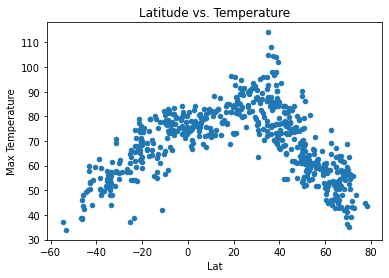

In [41]:
updated_cities_df.plot(kind="scatter", x="Lat", y="Max Temperature", title=f"Latitude vs. Temperature")

plt.show()

In [42]:
plt.savefig("output_data/Lat_vs_Temp.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

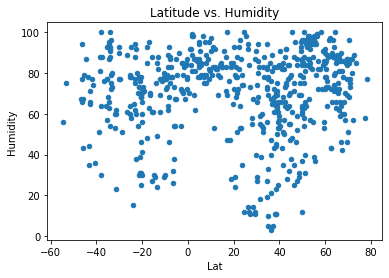

In [43]:
updated_cities_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"Latitude vs. Humidity")

plt.show()

In [47]:
plt.savefig("output_data/Lat_vs_Humidity.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

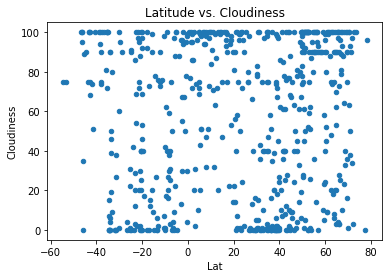

In [45]:
updated_cities_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"Latitude vs. Cloudiness")

plt.show()

In [48]:
plt.savefig("output_data/Lat_vs_Cloudiness.png")

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

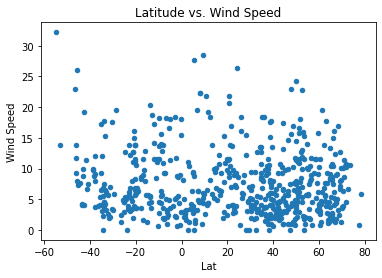

In [49]:
updated_cities_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"Latitude vs. Wind Speed")

plt.show()

In [50]:
plt.savefig("output_data/Lat_vs_Wind_Speed.png")

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [64]:
# import additional dependencies

from scipy.stats import linregress
from sklearn import datasets

In [65]:
# create dataframe for cities in the northern hemisphere

north_hemisphere_df = updated_cities_df.loc[updated_cities_df["Lat"] >= 0]

north_hemisphere_df

,City,Country,Lat,Lng,Humidity,Cloudiness,Max Temperature,Wind Speed,Date
0,Barrow,US,71.2906,-156.7887,87,90,39.22,10.36,1628289904
6,Miura,JP,35.1400,139.6192,77,100,87.98,8.37,1628290411
7,Aurangabad,IN,19.8833,75.3333,85,14,73.06,9.78,1628290413
8,Zyryanka,RU,65.7500,150.8500,70,97,53.51,8.16,1628290414
10,Hofn,IS,64.2539,-15.2082,88,90,51.62,2.62,1628290417
...,...,...,...,...,...,...,...,...,...
582,Bétérou,BJ,9.1992,2.2586,95,97,72.43,4.36,1628291377
583,Bocas del Toro,PA,9.3333,-82.2500,77,73,83.07,5.97,1628291378
584,Ixtapa,MX,20.7000,-105.2000,79,90,84.22,9.22,1628291380
585,Bud,US,39.4470,-86.1758,61,97,84.24,4.05,1628291381


In [66]:
# create dataframe for cities in the southern hemisphere

south_hemisphere_df = updated_cities_df.loc[updated_cities_df["Lat"] < 0]

south_hemisphere_df

,City,Country,Lat,Lng,Humidity,Cloudiness,Max Temperature,Wind Speed,Date
1,Vao,NC,-22.6667,167.4833,60,69,67.77,12.17,1628290402
2,Ahipara,NZ,-35.1667,173.1667,77,72,57.94,17.29,1628290007
3,Atuona,PF,-9.8000,-139.0333,77,17,78.31,18.25,1628289865
4,New Norfolk,AU,-42.7826,147.0587,65,100,52.92,4.00,1628289913
5,São João da Barra,BR,-21.6403,-41.0511,70,100,68.09,7.92,1628290336
...,...,...,...,...,...,...,...,...,...
572,Morrinhos,BR,-17.7311,-49.0994,48,100,69.31,8.66,1628291361
574,Omboué,GA,-1.5746,9.2618,83,67,74.55,8.57,1628291364
580,Walvis Bay,NA,-22.9575,14.5053,62,3,54.09,6.15,1628291247
587,Benalla,AU,-36.5500,145.9833,76,100,49.75,3.89,1628291384


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

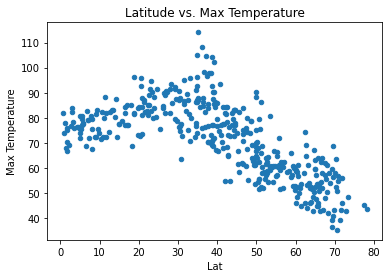

In [67]:
# create scatter plot

north_hemisphere_df.plot(kind="scatter", x="Lat", y="Max Temperature", title=f"Latitude vs. Max Temperature")

plt.show()

The r-squared is 0.4528952490227769
The linear regression model is y = -0.5x + 91.2


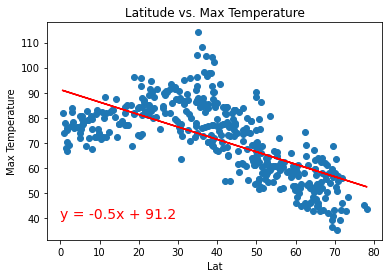

In [72]:
# plot linear regression

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(north_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (0, 40),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

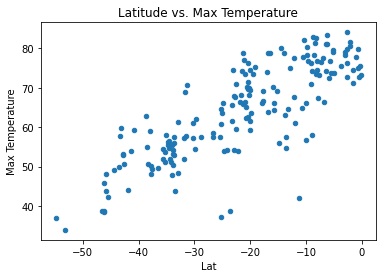

In [57]:
# create scatter plot

south_hemisphere_df.plot(kind="scatter", x="Lat", y="Max Temperature", title=f"Latitude vs. Max Temperature")

plt.show()

The r-squared is 0.6609610672918391
The linear regression model is y = 0.72x + 79.87


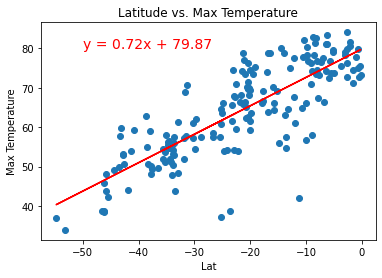

In [74]:
#plot linear regression

x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Max Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(south_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (-50, 80),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Max Temperature")
plt.title("Latitude vs. Max Temperature")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

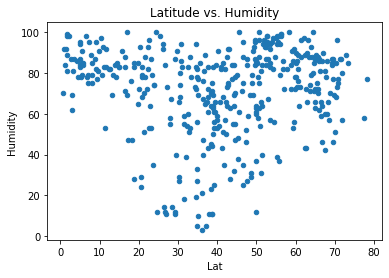

In [58]:
# create scatter plot

north_hemisphere_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"Latitude vs. Humidity")

plt.show()

The r-squared is 0.0001222994303175774
The linear regression model is y = 0.01x + 70.86


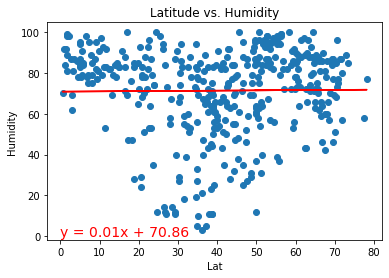

In [75]:
# plot linear regression

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(north_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (0, 0),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

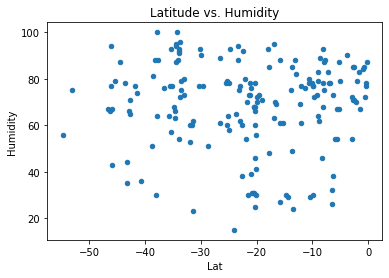

In [59]:
# create scatter plot

south_hemisphere_df.plot(kind="scatter", x="Lat", y="Humidity", title=f"Latitude vs. Humidity")

plt.show()


The r-squared is 0.0001619258569524799
The linear regression model is y = -0.02x + 68.14


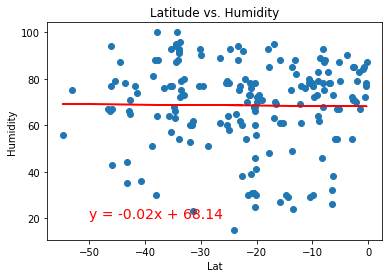

In [77]:
# plot linear regression

x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(south_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (-50, 20),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

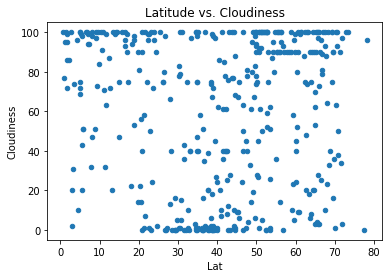

In [61]:
# create scatter plot

north_hemisphere_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"Latitude vs. Cloudiness")

plt.show()

The r-squared is 0.0002721731635687528
The linear regression model is y = -0.03x + 59.2


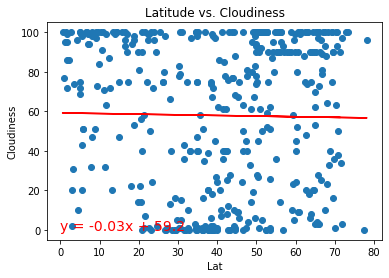

In [78]:
# plot linear regression

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(north_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (0, 0),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

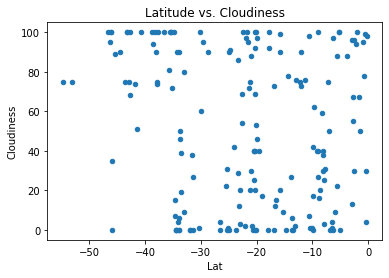

In [60]:
# create scatter plot

south_hemisphere_df.plot(kind="scatter", x="Lat", y="Cloudiness", title=f"Latitude vs. Cloudiness")

plt.show()

The r-squared is 0.027390654939357797
The linear regression model is y = -0.48x + 40.08


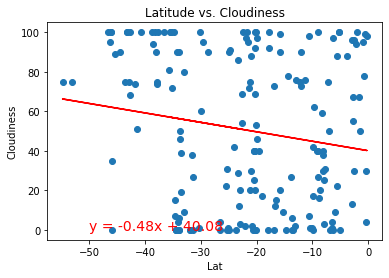

In [82]:
# plot linear regression

x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(south_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (-50, 0),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

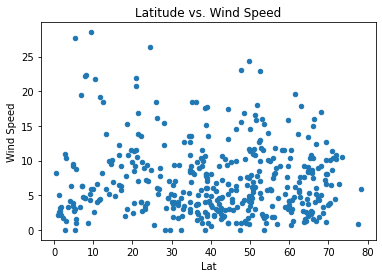

In [62]:
# create scatter plot

north_hemisphere_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"Latitude vs. Wind Speed")

plt.show()

The r-squared is 0.0015916784272962834
The linear regression model is y = -0.01x + 7.58


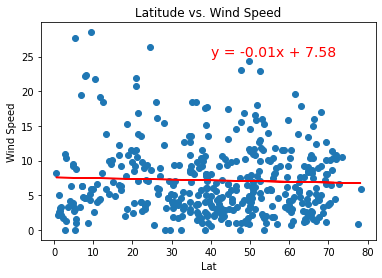

In [83]:
# plot linear regression

x_values = north_hemisphere_df["Lat"]
y_values = north_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(north_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (40, 25),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

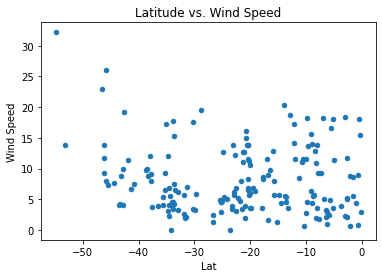

In [63]:
# create scatter plot

south_hemisphere_df.plot(kind="scatter", x="Lat", y="Wind Speed", title=f"Latitude vs. Wind Speed")

plt.show()

The r-squared is 0.012313080305889708
The linear regression model is y = -0.05x + 7.07


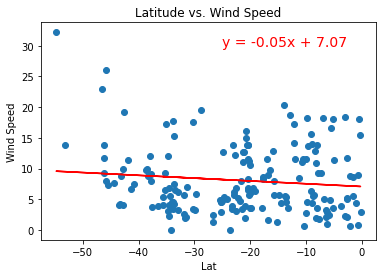

In [86]:
# plot linear regression

x_values = south_hemisphere_df["Lat"]
y_values = south_hemisphere_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(south_hemisphere_df["Lat"],regress_values,"r-")
plt.annotate(line_eq, (-25, 30),fontsize=14,color="red")

plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")

print(f'The r-squared is {rvalue**2}')
print(f'The linear regression model is {line_eq}')

plt.show()